In [1]:
#Importing necessary libraries
import numpy as np
import scipy as sp
import matplotlib as mpl # 
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import sklearn
from sklearn import model_selection
import pickle

In [2]:
# Importing dataset
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
# Observes the result column. Here 1 = phishing and -1 = Legitimate
df['Result'].unique()

array([-1,  1], dtype=int64)

In [5]:
df.shape

(11055, 32)

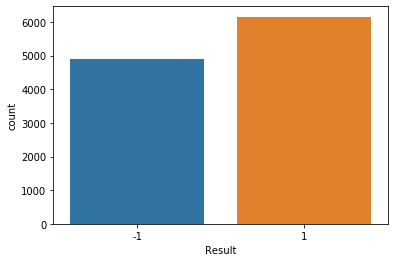

In [6]:
# Shows the total distribution of phishing and legitimate sites in the dataset
import seaborn as sns
sns.countplot(df['Result'])

In [7]:
# Shows Unique values for each columns
col=df.columns
for i in col:
     if  i!='index':
        print(i,df[i].unique())

having_IPhaving_IP_Address [-1  1]
URLURL_Length [ 1  0 -1]
Shortining_Service [ 1 -1]
having_At_Symbol [ 1 -1]
double_slash_redirecting [-1  1]
Prefix_Suffix [-1  1]
having_Sub_Domain [-1  0  1]
SSLfinal_State [-1  1  0]
Domain_registeration_length [-1  1]
Favicon [ 1 -1]
port [ 1 -1]
HTTPS_token [-1  1]
Request_URL [ 1 -1]
URL_of_Anchor [-1  0  1]
Links_in_tags [ 1 -1  0]
SFH [-1  1  0]
Submitting_to_email [-1  1]
Abnormal_URL [-1  1]
Redirect [0 1]
on_mouseover [ 1 -1]
RightClick [ 1 -1]
popUpWidnow [ 1 -1]
Iframe [ 1 -1]
age_of_domain [-1  1]
DNSRecord [-1  1]
web_traffic [-1  0  1]
Page_Rank [-1  1]
Google_Index [ 1 -1]
Links_pointing_to_page [ 1  0 -1]
Statistical_report [-1  1]
Result [-1  1]


In [8]:
#Replacing -1 with 0 as we will do binary classification
df['Result']=df['Result'].replace(-1,0)

In [9]:
df.shape

(11055, 32)

In [10]:
# Print correlation of the features with target variable
print(df.corr()['Result'].sort_values())

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
index                          0.000978
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229


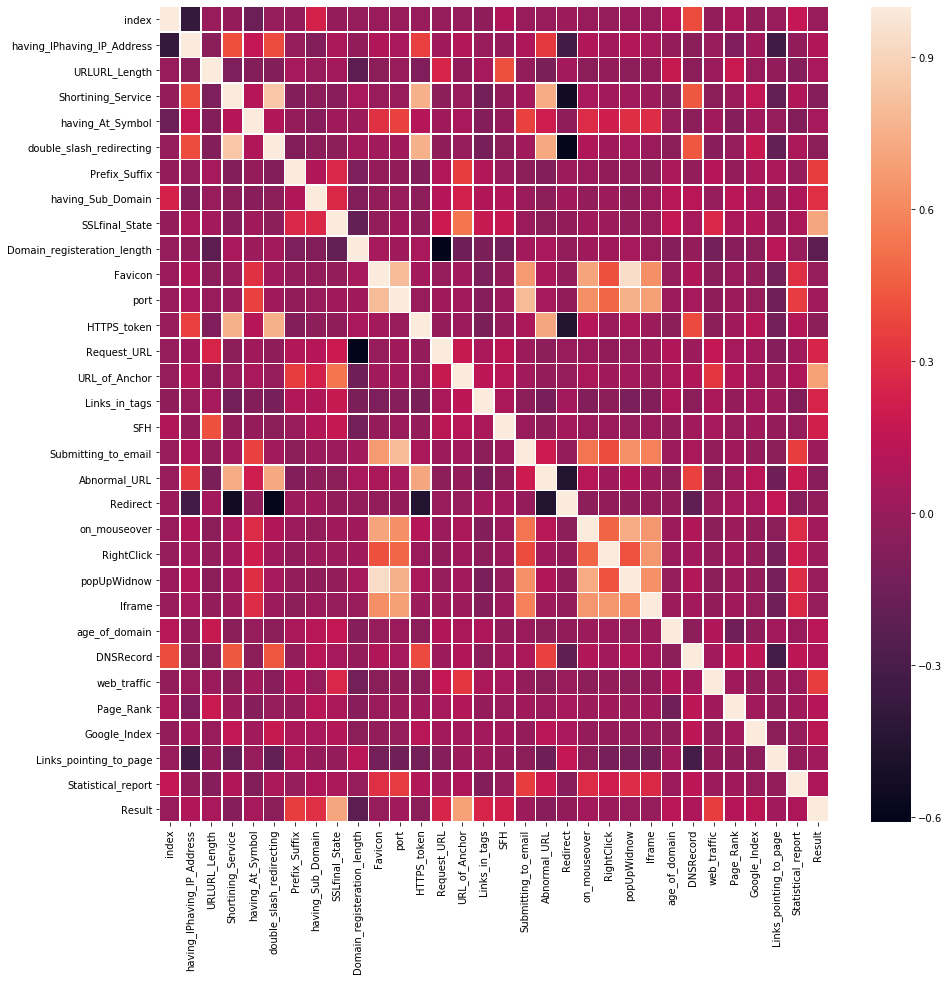

In [11]:
#Printing Heat Map
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), linewidths=.5)

# Building Model

## Spliting into training and testing

In [18]:
from sklearn.model_selection import train_test_split,cross_val_score

X= df.drop(columns='Result') # Drops the result column cause we will use this for classification purpose.
Y=df['Result'] 

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2) # Splitting the dataset

### 1. Logistic Regression

Accuracy of Logistic Regression:  0.9258365993367501
Accuracy of Logistic Regression:  [[1323  109]
 [ 137 1748]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


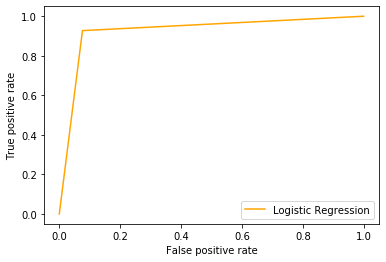

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve,auc, confusion_matrix

lr=LogisticRegression()
lr.fit(train_X,train_Y)
pred=lr.predict(test_X)
print("Accuracy of Logistic Regression: ", accuracy_score(pred, test_Y))
print("Accuracy of Logistic Regression: ", confusion_matrix(pred, test_Y,))
fpr1,tpr1,thresh1 = roc_curve(pred, test_Y)

# Ploting ROC Curve of Logistic Regression
plt.plot(fpr1,tpr1,'orange',label = 'Logistic Regression')
plt.legend("Logistic Regression", loc='lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='lower right')

### 2. KNeighbours Classifier

Accuracy of KNN Clssifier:  0.618631293337353
Accuracy of KNN Clssifier:  [[ 855  660]
 [ 605 1197]]


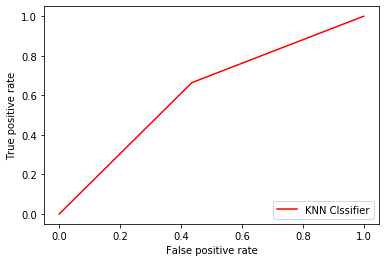

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
model= knn.fit(train_X,train_Y)
pred=model.predict(test_X)
print("Accuracy of KNN Clssifier: ", accuracy_score(pred, test_Y))
print("Accuracy of KNN Clssifier: ", confusion_matrix(pred, test_Y,))
fpr2,tpr2,thresh2 = roc_curve(pred, test_Y)

# Ploting ROC Curve of Kneighbours Classifier
plt.plot(fpr2,tpr2,'red',label = 'KNN Clssifier')
plt.legend("KNN Clssifier", loc='lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='lower right')

### 3. Naive Bayes

Accuracy of Naive Bayes:  0.9035272836900814
Accuracy of Naive Bayes:  [[1311  171]
 [ 149 1686]]


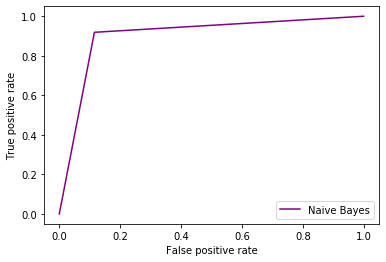

In [61]:
from sklearn.naive_bayes import BernoulliNB
bayes = BernoulliNB()
bayes.fit(train_X, train_Y)
pred=bayes.predict(test_X)
print("Accuracy of Naive Bayes: ", accuracy_score(pred, test_Y))
print("Accuracy of Naive Bayes: ", confusion_matrix(pred, test_Y,))
fpr3,tpr3,thresh3 = roc_curve(pred, test_Y)

# Ploting ROC Curve of Naive Bayes
plt.plot(fpr3,tpr3,'purple',label = 'Naive Bayes')
plt.legend("Naive Bayes", loc='lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='lower right')

### 4. Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(max_depth=10, random_state=0)
forest_clf.fit(train_X,train_Y)
ran_pred=forest_clf.predict(test_X)
accuracy_score(ran_pred,test_Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9499547784142297

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [65]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [66]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X,train_Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 14.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [67]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

Accuracy of Random Forest:  0.9719626168224299
Accuracy of Random Forest:  [[1404   37]
 [  56 1820]]


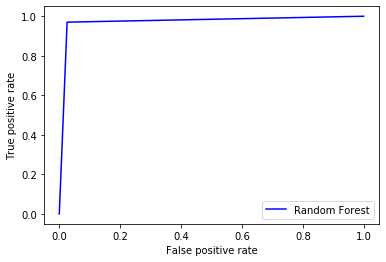

In [68]:
forest_clf = RandomForestClassifier(bootstrap=False,max_depth=20,max_features='auto',min_samples_leaf=1,min_samples_split=2,n_estimators=1800)
forest_clf.fit(train_X,train_Y)
ran_pred=forest_clf.predict(test_X)
print("Accuracy of Random Forest: ", accuracy_score(ran_pred,test_Y))
print("Accuracy of Random Forest: ", confusion_matrix(ran_pred, test_Y,))
fpr4,tpr4,thresh4 = roc_curve(ran_pred, test_Y)

#Ploting ROC Curve of Logistic Regression
plt.plot(fpr4,tpr4,'blue',label = 'Random Forest')
plt.legend("Random Forest", loc='lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='lower right')

In [77]:
#Saving the Random Forest Model as it gives the highest accuracy
filename = 'final_Trained_Model.pkl'
pickle.dump(forest_clf, open(filename, 'wb'))

### 5. Support Vector Machine (SVM)

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(train_X,train_Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   6.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   6.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   7.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.556, total=   7.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.556, total=   6.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.556, total=   6.9s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.556, total=   6.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.556, total=   6.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.556, total=   6.3s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.556, total=   6.6s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.556, total=   6.8s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.556, total=   6.6s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.648, total=   6.7s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.634, total=   7.4s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.641, total=   6.9s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.738, total=   6.9s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  8.3min finished


[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.896, total=   9.3s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [69]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

Accuracy of SVM:  0.9074464877901719
Accuracy of SVM:  [[1278  125]
 [ 182 1732]]


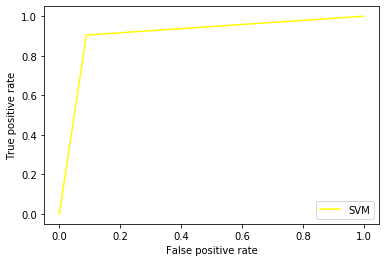

In [70]:
svm_clf =SVC(C=100, gamma=0.0001, kernel='rbf')
svm_clf.fit(train_X,train_Y)
pred=svm_clf.predict(test_X)
print("Accuracy of SVM: ", accuracy_score(pred,test_Y))
print("Accuracy of SVM: ", confusion_matrix(pred, test_Y,))
fpr5,tpr5,thresh = roc_curve(pred, test_Y)

#Ploting ROC Curve of SVM
plt.plot(fpr5,tpr5,'yellow',label = 'SVM')
plt.legend("SVM", loc='lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='lower right')

### 6. XGBoost Classifier

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:30:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
==== FOLD 1 ====
Confusion matrix of XGBoost: 
[[1128   55]
 [  36 1545]]
Accuracy score of XGBoost: 
0.9670767004341534
[20:30:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
==== FOLD 2 ====
Confusion matrix of XGBoost: 
[[1165   51]
 [  44 1504]]
Accuracy score of XGBoost: 
0.965629522431259
[20:30:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the defaul

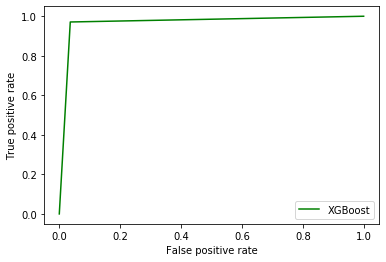

In [74]:
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

folds = KFold(n_splits=4, shuffle=True, random_state=42) # Using 4 folds for XGBoost Classifier.

train_index_list = list()
validation_index_list = list()
fpr6 =0
tpr6 =0
thresh6 =0

for fold, (train_idx, validation_idx) in enumerate(folds.split(X, Y)):
    
    model = XGBClassifier()
    model.fit(np.array(X)[train_idx,:], np.array(Y)[train_idx])
    predicted_values = model.predict(np.array(X)[validation_idx,:])
    print(f'==== FOLD {fold+1} ====')
    #binary_classification_accuracy(np.array(Y)[validation_idx], predicted_values)
    print(f'Confusion matrix of XGBoost: \n{confusion_matrix(np.array(Y)[validation_idx], predicted_values)}')
    print(f'Accuracy score of XGBoost: \n{accuracy_score(np.array(Y)[validation_idx], predicted_values)}')
    fpr6,tpr6,thresh6 = roc_curve(np.array(Y)[validation_idx], predicted_values)

plt.plot(fpr6,tpr6,'green',label = 'XGBoost')
plt.legend("XGBoost", loc='lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='lower right')

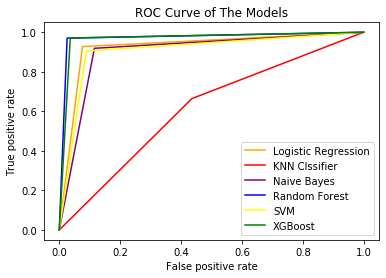

In [76]:
# Plotting all the ROC Curves in one place
plt.plot(fpr1,tpr1,'orange',label = 'Logistic Regression')
plt.plot(fpr2,tpr2,'red',label = 'KNN Clssifier')
plt.plot(fpr3,tpr3,'purple',label = 'Naive Bayes')
plt.plot(fpr4,tpr4,'blue',label = 'Random Forest')
plt.plot(fpr5,tpr5,'yellow',label = 'SVM')
plt.plot(fpr6,tpr6,'green',label = 'XGBoost')
plt.legend("Logistic Regression", loc='lower right')
plt.legend("KNN Clssifier", loc='lower right')
plt.legend("Naive Bayes", loc='lower right')
plt.legend("Random Forest", loc='lower right')
plt.legend("SVM", loc='lower right')
plt.legend("XGBoost", loc='lower right')
plt.legend(loc='lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('ROC Curve of The Models')
plt.show()